# Introducción a la Visión computacional

## ¿Qué es la Visión computacional?

## Notebook disponible en github.com/rpmunoz/computer_vision

La visión computacional es un campo interdisciplinario que estudia el cómo proveer a los computadores de las mismas capacidades visuales que poseemos los humanos. Como disciplina científica, se preocupa de construir la base teórica que permite a los sistemas artificiales extraer información a partir de imágenes.

Se dice que es un campo interdisciplinario pues surge a partir de la interacción de múltiples disciplinas tales como Procesamiento de imágenes, Ciencias de la Computación, Física y Matemáticas.

![Image of Computer Vision](figures/computer_vision_venn_diagram.jpg)

Un sistema de visión computacional transforma un dato no estructurado y en uno estructurado uqe permita tomar decisiones. Las principales etapas asociadas al procesamiento de una imagen digital son las siguientes,

1. Adquisición
2. Procesamiento
3. Análisis
4. Entendimiento
5. Generación de información

## Aplicaciones populares

- Inspeción automatizada (e.g. fábrica de botellas)
- Asistencia en tareas de identificación (e.g. identificación de personas)
- Detección de eventos (e.g. vigilancia con cámaras)
- Navegación (e.g. automóviles autónomos)

## Tareas

- Detección y reconocimiento de objetos
- Análisis de movimiento
- Reconstrucción de escenas
- Restauración de imágenes

## **1. Usando el paquete scikit-image**

Scikit-image es el paquete más usado de Python para leer y procesar imágenes.

Se puede instalar usando **`pip3 install scikit-image`**

Se puede importar usando el commando **`import skimage`**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

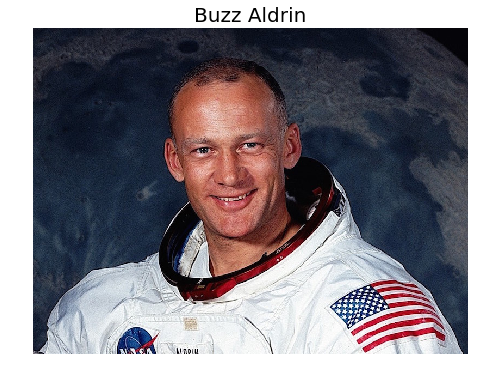

In [2]:
im_file='data/buzz_aldrin.jpg'
im = io.imread(im_file)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im)
ax.axis('off')
ax.set_title('Buzz Aldrin', fontsize=20)

Las dimensiones de la imagen se pueden imprimir usando el metodo shape del objeto im. El primer elemento es el tamaño en el eje Y, el segundo en el eje X y el tercero el numero de canales.

In [3]:
print("Image number of channels: ",im.ndim)
print("Image dimensions: ",im.shape)

Image number of channels:  3
Image dimensions:  (600, 800, 3)


In [4]:
from skimage import exposure

def iter_channels(color_image):
    """Yield color channels of an image."""
    # Roll array-axis so that we iterate over the color channels of an image.
    for channel in np.rollaxis(color_image, -1):
        yield channel

def plot_histogram(image, ax=None, **kwargs):
    """ Plot the histogram of an image (gray-scale or RGB) on `ax`.
    Calculate histogram using `skimage.exposure.histogram` and plot as filled
    line. If an image has a 3rd dimension, assume it's RGB and plot each
    channel separately.
    """
    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        # `channel` is the red, green, or blue channel of the image.
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)


def _plot_histogram(ax, image, alpha=0.3, **kwargs):
    # Use skimage's histogram function which has nice defaults for
    # integer and float images.
    hist, bin_centers = exposure.histogram(image)
    ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
    ax.set_xlabel('intensity')
    ax.set_ylabel('# pixels')

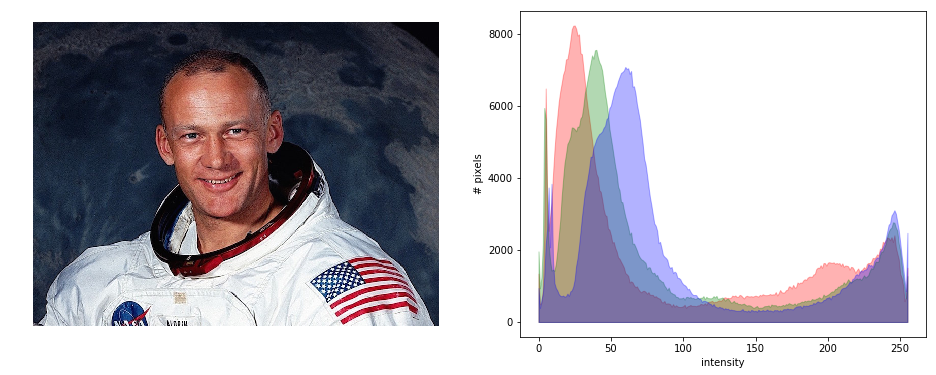

In [5]:
fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*8, 6))

ax_image.imshow(im)
ax_image.axis('off')
plot_histogram(im, ax=ax_hist)

Usamos el método adjust_gamma() para ajustar el brillo de la imagen

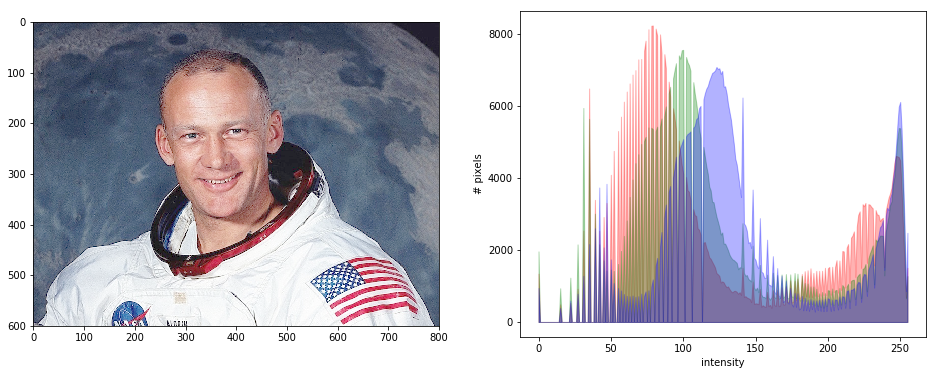

In [6]:
im_bright = exposure.adjust_gamma(im, gamma=0.5, gain=1)

fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*8, 6))

ax_image.imshow(im_bright)
plot_histogram(im_bright, ax=ax_hist)

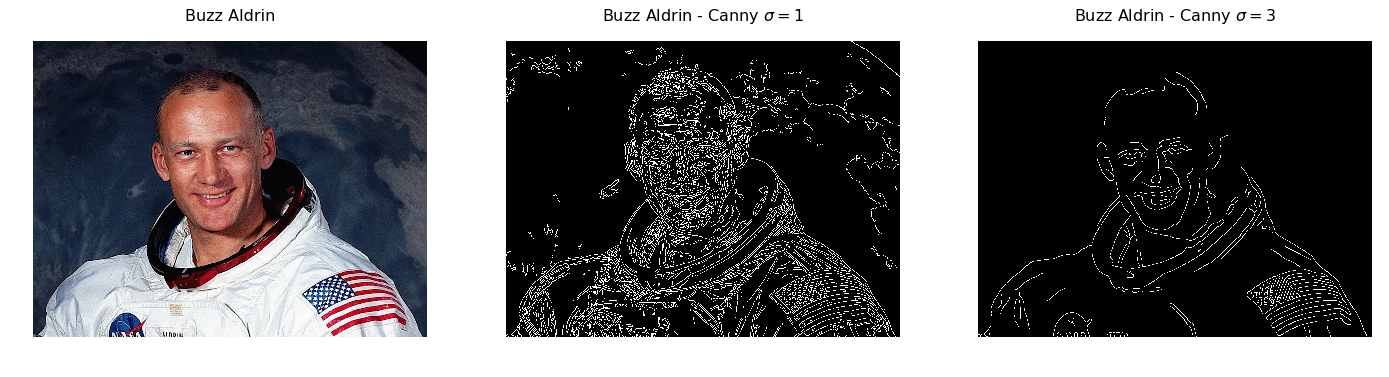

In [7]:
from skimage.color import rgb2gray
from skimage import feature

im_gray = rgb2gray(im)

edges1 = feature.canny(im_gray)
edges2 = feature.canny(im_gray, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6),
                                    sharex=True, sharey=True)

ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Buzz Aldrin', fontsize=16)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Buzz Aldrin - Canny $\sigma=1$', fontsize=16)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Buzz Aldrin - Canny $\sigma=3$', fontsize=16)

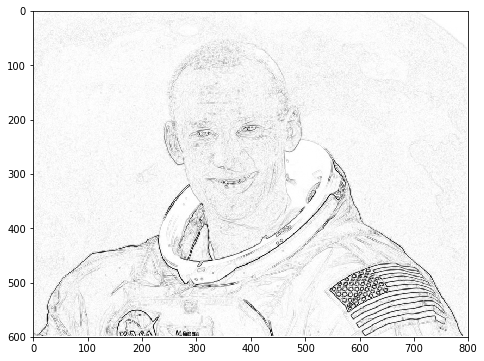

In [8]:
from skimage.exposure import rescale_intensity
from skimage.color.adapt_rgb import adapt_rgb
from skimage import filters
from skimage.color import rgb2gray

def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(rescale_intensity(1 - sobel_gray(im)), cmap=plt.cm.gray)

## **2. Usando la librería opencv**

OpenCV es la librería de visión computacional más usada por la comunidad. La versión estable más reciente corresponde a la 3.2.0 y puede ser descargada desde el repositorio en [Github](https://github.com/opencv/opencv).

- https://github.com/opencv/opencv
- https://github.com/jrosebr1/imutils

In [9]:
import cv2
import imutils
from imutils.object_detection import non_max_suppression

print('OpenCV version: ', cv2.__version__)
print('imutils version: ', imutils.__version__)

OpenCV version:  3.2.0
imutils version:  0.4.3


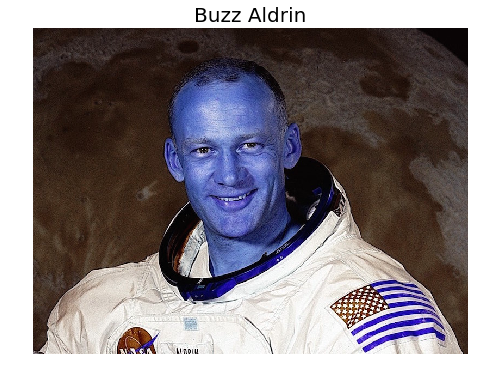

In [10]:
im_file='data/buzz_aldrin.jpg'
im=cv2.imread(im_file)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im)
ax.axis('off')
ax.set_title('Buzz Aldrin', fontsize=20)

A diferencia de la mayoría de las librerías, en OpenCV el order de los canales de color es **BGR** en vez de **RGB**.

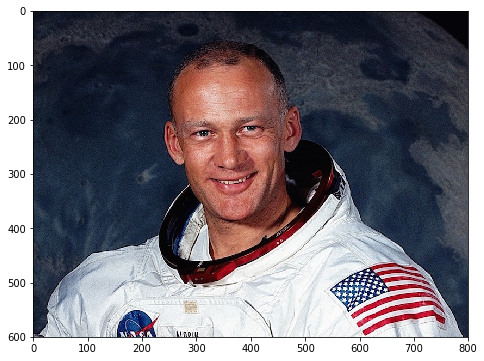

In [11]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)

Usando las primitivas de OpenCV para desplegar imágenes

In [12]:
cv2.imshow('image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.1 Detección de caras usando un clasificador de cascada basado en features de Haar

OpenCV incluye una serie de métodos para detectar objetos. Los métodos más conocidos para detectar rostros y rasgos faciales se llama Haar cascadades (Viola and Jones, 2001)

![Image of Haar](figures/haar_features.jpg)

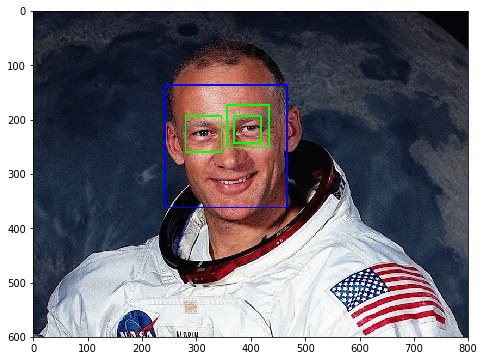

In [13]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

im_bgr = im.copy()
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces = face_cascade.detectMultiScale(im_gray, scaleFactor=1.3, minNeighbors=5)
for (x,y,w,h) in faces:
    cv2.rectangle(im_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = im_gray[y:y+h, x:x+w]
    roi_color = im_bgr[y:y+h, x:x+w]
    
    # detect eyes in the face
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(10,10), maxSize=(120,120))

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)

#cv2.imshow('image',im_bgr)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


(-0.5, 799.5, 599.5, -0.5)

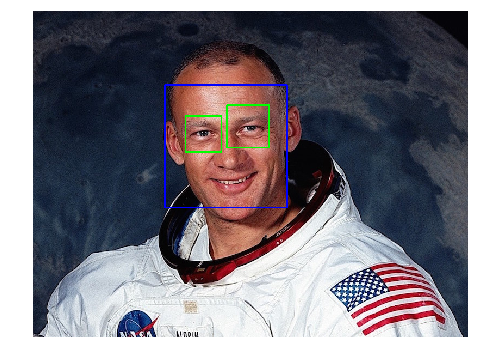

In [14]:
im_bgr = im.copy()
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(im_gray, scaleFactor=1.3, minNeighbors=5)
for (x,y,w,h) in faces:
    cv2.rectangle(im_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = im_gray[y:y+h, x:x+w]
    roi_color = im_bgr[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(10,10), maxSize=(120,120))

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in eyes])
    eyes_nms = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    
    for (ex1,ey1,ex2,ey2) in eyes_nms:
        cv2.rectangle(roi_color,(ex1,ey1),(ex2,ey2),(0,255,0),2)

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)
ax.axis('off')

## 2.2 Detección de personas usando un clasificador de cascada basado en HOG descriptor

El descriptor de Histogram of oriented gradient (HOG; Dalal and Triggs 2005) ha sido uno de los más empleados por la comunidad en los últimos años. Se define un ventana móvil que recorre la imagen por completo y dentro de ellas se calcula el gradiente en 9 ángulos distintos.

- https://www.quora.com/What-are-HOG-features-in-computer-vision-in-laymans-terms

![Image of HOG](figures/hog_histogram.jpg)

(-0.5, 499.5, 944.5, -0.5)

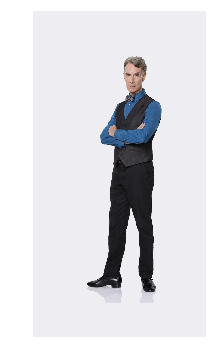

In [15]:
im_file='data/bill_nye.jpg'

im=cv2.imread(im_file)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)
ax.axis('off')

(-0.5, 399.5, 755.5, -0.5)

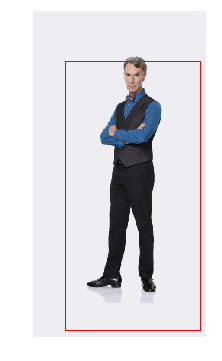

In [16]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

im_bgr = im.copy()
im_bgr = imutils.resize(im_bgr, width=min(400, im_bgr.shape[1]))

# detect people in the image
(rects, weights) = hog.detectMultiScale(im_bgr, winStride=(4, 4),
    padding=(6, 6), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(im_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)
ax.axis('off')

## 3. Detección de rasgos faciales usando Dlib

Dlib es una librería de machine learning escrita en C++. Incluye métodos de clasificacón, regresión, SVM, detección de rostros y rasgos, deep learning, 

- http://dlib.net/
- https://github.com/davisking/dlib

Descargar el modelo del detector de rasgos faciales desde http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

<img src="figures/facial_landmarks_68.jpg" width="400">


In [17]:
from imutils import face_utils
import imutils
import dlib

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    
    # return the list of (x, y)-coordinates
    return coords

(-0.5, 799.5, 599.5, -0.5)

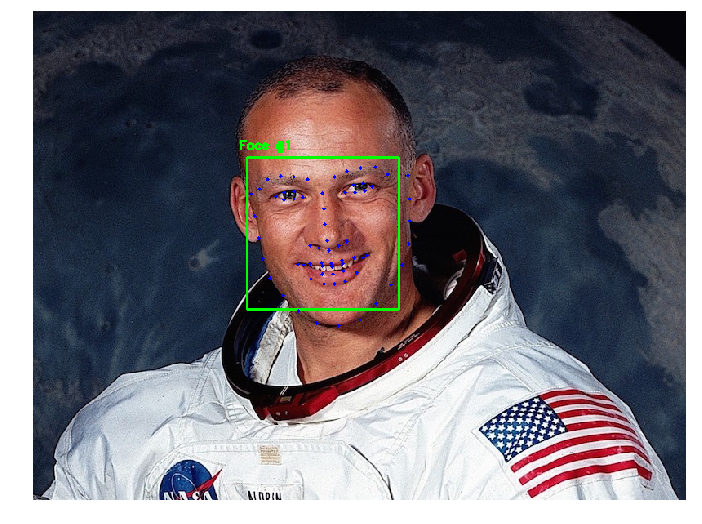

In [19]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Volumes/Data/Computer_Vision/shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
im_file='data/buzz_aldrin.jpg'
im = cv2.imread(im_file)

im_bgr = im.copy()#imutils.resize(im, width=500)
im_gray = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(im_gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(im_gray, rect)
    shape = face_utils.shape_to_np(shape)
 
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(im_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
    # show the face number
    cv2.putText(im_bgr, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(im_bgr, (x, y), 2, (255, 0, 0), -1)
        
# show the output image with the face detections + facial landmarks
im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.imshow(im_rgb)
ax.axis('off')

## 4. Detección de rostros usando la Microsoft Face API

Microsoft ofrece una serie de servicios cognitivos que permiten analizar automáticamente imágenes, audio y texto. Estos servicios son del tipo REST API y pueden ser consultados usando diferentes lenguajes como C#, java y Python.

- https://azure.microsoft.com/en-us/services/cognitive-services/

In [20]:
import cv2
import cognitive_face as CF

KEY = ''
CF.Key.set(KEY)

In [21]:
def read_image(im_file, bytestream=False):

    faceapi_max_pix = 2048
    im_data = cv2.imread(im_file)
    im_shape = im_data.shape[0:2]
 
    max_id = np.argmax(im_shape)
    max_pix = im_shape[max_id]
    if max_pix > faceapi_max_pix:
        print('Image is larger than 4096 pixels')
        scale = faceapi_max_pix*1./max_pix
        shape = (int(im_shape[1]*scale), int(im_shape[0]*scale))
        im_data = cv2.resize(im_data, shape, interpolation=cv2.INTER_LANCZOS4)

    im_data = cv2.cvtColor(im_data, cv2.COLOR_BGR2RGB)
    
    print('Image dimensions: ', im_data.shape)
    if bytestream:
        im_byte = cv2.imencode('.jpg', im_data)[1].tostring()
        print('Image size: ', len(bytearray(im_byte))/1e6, ' MB')
        return (im_data, im_byte)
    else:
        return im_data

### Detección de personas

Image dimensions:  (1365, 2048, 3)
Image size:  1.103149  MB
Number of faces:  36


(-0.5, 2047.5, 1364.5, -0.5)

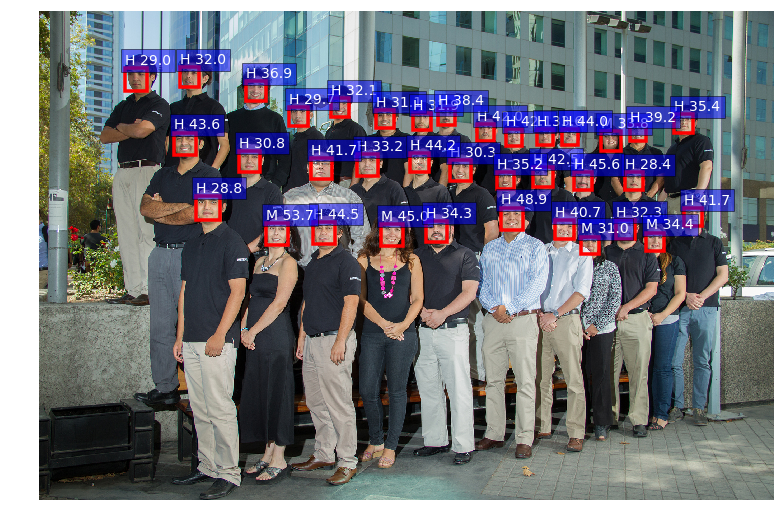

In [22]:
im_file = 'data/metric_team_2014.jpg'
im_dpi = 72
faceapi_attributes = ['age', 'gender', 'smile', 'facialHair', 'glasses', 'emotion']

im_data, im_byte = read_image(im_file, bytestream=True)
im_shape = im_data.shape

face_list = CF.face.detect(im_data, False, False, ",".join(faceapi_attributes))
face_n = len(face_list)

print('Number of faces: ', face_n)

#fig, ax = plt.subplots(1, 1, figsize=(im_shape[1]/im_dpi, im_shape[0]/im_dpi), frameon = False, dpi=im_dpi)
fig, ax = plt.subplots(1, 1, figsize=(16, 9), frameon = False)
ax.imshow(im_data)

for face in face_list:
    rect = face['faceRectangle']
    ax.add_patch( plt.Rectangle( (rect['left'], rect['top']), rect['width'], rect['height'],
                                fill=False, edgecolor='red', linewidth=3.5) )   

    att = face['faceAttributes']
    if att['gender'] == 'male':
        sex = 'H'
    else:
        sex = 'M'
    age = float(att['age'])
    
    ax.text( rect['left'], rect['top'] - 10,
                '{:s} {:.1f}'.format(sex, age),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')
        
ax.axis('off')
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('figures/metric_team_2014_demographics.jpg', bbox_inches=extent, dpi=im_dpi)

### Identificación de personas

In [23]:
group_name='metric'

person_groups = CF.person_group.lists()
for person_group in person_groups:
    person_group_name = person_group['name']
    person_group_id = person_group['personGroupId']
    if person_group_name == 'metric':
        metric_group_id=person_group_id
        print("Metric group was found. metric_group_id= ", metric_group_id, "\n")


metric_id_names = {}
persons = CF.person.lists(metric_group_id)

print('Listing persons in the DB')
for person in persons:
    person_name = person['name']
    person_id = person['personId']
    metric_id_names[person_id] = person_name
    
    print('Name: ', person_name)

Metric group was found. metric_group_id=  664bd5c7-0f1c-11e7-9e4d-a45e60e67917 

Listing persons in the DB
Name:  Marco
Name:  Patricio
Name:  Jaime
Name:  Francisco
Name:  Roberto


Image dimensions:  (1365, 2048, 3)
Image size:  1.103149  MB
0 10
Request: Identifying 10 faces in group "664bd5c7-0f1c-11e7-9e4d-a45e60e67917"
10 20
Request: Identifying 10 faces in group "664bd5c7-0f1c-11e7-9e4d-a45e60e67917"
20 30
Request: Identifying 10 faces in group "664bd5c7-0f1c-11e7-9e4d-a45e60e67917"
30 36
Request: Identifying 6 faces in group "664bd5c7-0f1c-11e7-9e4d-a45e60e67917"
[{'name': 'Jaime', 'left': 1286, 'top': 549, 'width': 62, 'height': 62, 'gender': 'male', 'age': 48.9}, {'name': 'Patricio', 'left': 1437, 'top': 584, 'width': 54, 'height': 54, 'gender': 'male', 'age': 40.7}, {'name': 'Marco', 'left': 1771, 'top': 289, 'width': 52, 'height': 52, 'gender': 'male', 'age': 35.4}]


(-0.5, 2047.5, 1364.5, -0.5)

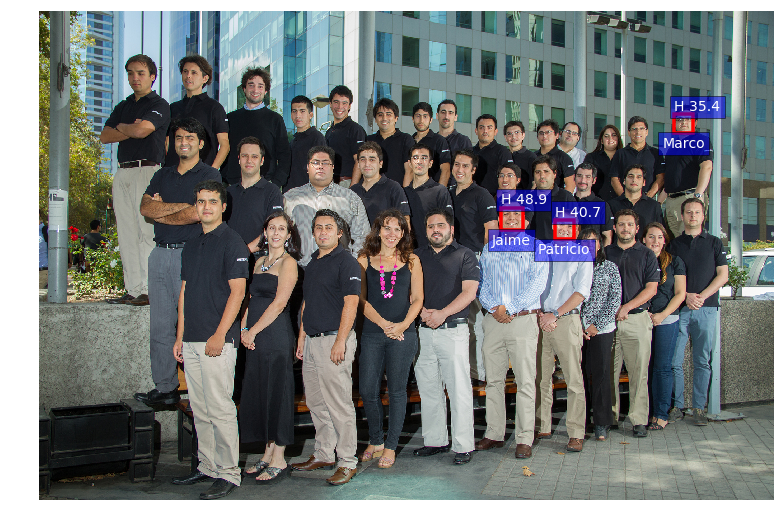

In [24]:
detection_file = 'data/metric_team_2014.jpg'
im_dpi=72
faceapi_attributes = ['age', 'gender', 'smile', 'facialHair', 'glasses', 'emotion']

faces = {}
face_ids = []
face_rects = []
face_attrs = []
face_identification = []

im_data, im_byte = read_image(detection_file, bytestream=True)
im_shape = im_data.shape

res = CF.face.detect(im_data, True, False, ",".join(faceapi_attributes))
for entry in res:
    face_id = entry['faceId']
    face_ids.append(face_id)
    
    face_rect = entry['faceRectangle']
    face_rects.append({'left': int(face_rect['left']), 'top': int(face_rect['top']),
                       'width': int(face_rect['width']), 'height': int(face_rect['height'])})

    face_attr = entry['faceAttributes']
    face_attrs.append({'gender':str(face_attr['gender']), 'age':float(face_attr['age'])}) 
    
    
for i in np.arange(0, len(face_ids), 10):
    i_min=i
    i_max=min([i+10,len(face_ids)])
    print(i_min, i_max)
    
    print('Request: Identifying {0} faces in group "{1}"'.format( i_max-i_min, metric_group_id))

    res = CF.face.identify(face_ids[i_min:i_max], metric_group_id)

    for entry in res:
        face_id = entry['faceId']
        index = face_ids.index(face_id)
        rect = face_rects[index]
        attr = face_attrs[index]
        
        if entry['candidates']:
            person_id = entry['candidates'][0]['personId']
            
            face_identification.append( {'name':metric_id_names[person_id], 'left':rect['left'],
                                         'top':rect['top'], 'width':rect['width'], 'height':rect['height'],
                                         'gender':attr['gender'], 'age':attr['age']} )
print(face_identification)

#fig, ax = plt.subplots(1, 1, figsize=(im_shape[1]/im_dpi, im_shape[0]/im_dpi), frameon = False, dpi=im_dpi)
fig, ax = plt.subplots(1, 1, figsize=(16, 9), frameon = False)
ax.imshow(im_data)

for face in face_identification:
    ax.add_patch( plt.Rectangle( (face['left'], face['top']), face['width'], face['height'],
                                fill=False, edgecolor='red', linewidth=3.5) )   
    
    ax.text( face['left'], face['top'] - 10,
                '{:s} {:.1f}'.format('H' if face['gender']=='male' else 'F', face['age']),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')
    
    ax.text( face['left'] + face['width']/2., face['top'] + face['height'] + 10,
                '{:s}'.format(face['name']),
                horizontalalignment='center', verticalalignment='top',
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

ax.axis('off')
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('figures/metric_team_2014_identification.jpg', bbox_inches=extent, dpi=im_dpi)